In [1]:
import torch
from torch import nn
import torchvision.datasets as datasets 
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

from models import *

import matplotlib.pyplot as plt

Loading the dataset

In [2]:
testing_data = datasets.MNIST(root='datasets', download=True, train=False, transform=ToTensor())

Displaying a few sample images

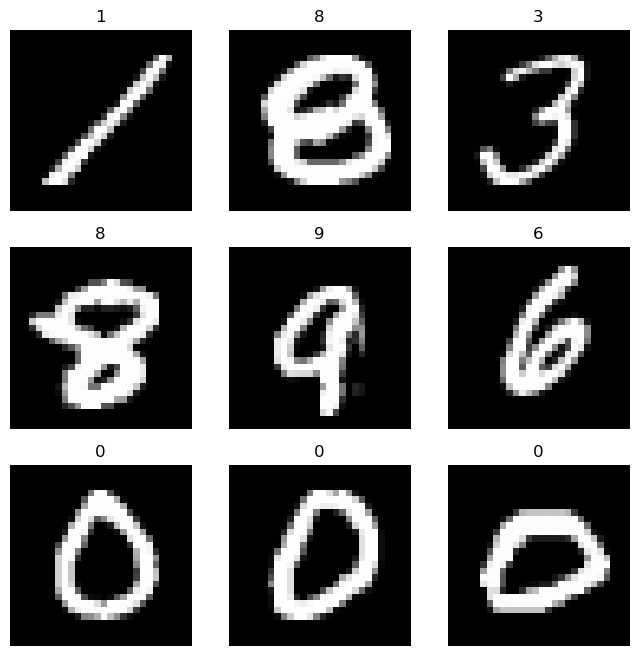

In [3]:
figure = plt.figure(figsize = (8,8))
rows, cols = 3, 3
sample_indices = []

for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(testing_data), size=(1,)).item()
  sample_indices.append(sample_idx)
  img, label = testing_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")

Making a prediction

In [4]:
model_state_dict = torch.load('models/LinearNetwork/model.pth')

model = LinearNetwork()
model = model.cuda()
model.load_state_dict(model_state_dict)
predictions = []

for sample_idx in sample_indices:
	img, label = testing_data[sample_idx]
	prediction = model(img.to('cuda')).argmax(1)
	predictions.append(prediction)

for value in predictions:
	print(value)

tensor([1], device='cuda:0')
tensor([8], device='cuda:0')
tensor([3], device='cuda:0')
tensor([8], device='cuda:0')
tensor([9], device='cuda:0')
tensor([6], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')


In [5]:
model_state_dict = torch.load('models/ConvolutionalNetwork/model.pth')

model = ConvolutionalNetwork()
model = model.cuda()
model.load_state_dict(model_state_dict)
predictions = []

for sample_idx in sample_indices:
	img, label = testing_data[sample_idx]
	prediction = model(img.to('cuda')).argmax(0)
	predictions.append(prediction)

for value in predictions:
	print(value)

tensor(1, device='cuda:0')
tensor(8, device='cuda:0')
tensor(3, device='cuda:0')
tensor(8, device='cuda:0')
tensor(9, device='cuda:0')
tensor(6, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
